# Table of Contents:
1. [Introduction](#section-one)
    - [Problem Definition](#subsection-one)
    - [About Project](#subsection-two)
    - [Kernel Goals](#subsection-three)
    - [Gathering Data](#subsection-four)
2. [Prepare Data for Consumption](#section-two)
    - [Import Libraries](#subsection-five)
    - [Meet and Greet Data](#subsection-six)
    - [Data Cleaning](#subsection-seven)
3. [Exploratory Data Analysis](#section-three)
    - [Duration of pages vs Revenue](#subsection-eight)
    - [Month Vs Page value Vs Revenue](#subsection-nine)
    - [Bounce & Exit Rates Vs Revenue](#subsection-ten)
    - [Visitor type & Exit Rates Vs Revenue](#subsection-eleven)
    - [Correlation map ](#subsection-twelve)
4. [Strategies to improve conversion rate](#section-four)
5. [Feature Engineering and Selection](#section-five)
    - [Handling Outliers](#subsection-thirteen)
    - [Special Day- Feature Clubbing !](#subsection-fourteen)
    - [Converting Dtypes](#subsection-fifteen)
    - [Feature Scaling](#subsection-sixteen)
    - [Label Encoding](#subsection-seventeen)
    - [Feature Selection](#subsection-eighteen)
    - [Train and Test Split (80:20)](#subsection-nineteen)
6. [Modelling our Data](#section-six)
    - [Selecting the right model- Cross Validation](#subsection-twenty)
    - [Selecting the right model-Pipeline](#subsection-twentyone)
    - [Random Forest with Hyperparameter Tuning](#subsection-twentytwo)
    - [SVC with Hyperparameter Tuning](#subsection-twentythree)
6. [Conclusion](#section-seven)
    

<a id="section-one"></a>
<a id="subsection-one"></a>
# *1.Problem Definition*
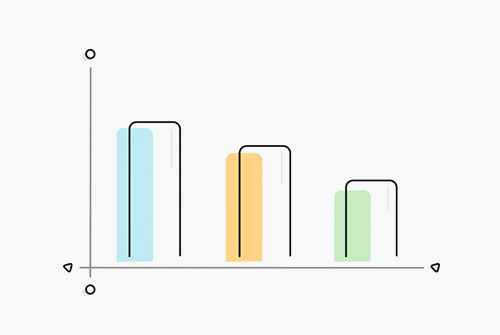
I'm a Data Analyst of XYZ Ltd. and this data consists of various information related to customer behavior in online shopping websites. It looks like our ecommerce client firm ABC needs to improve on its online sales conversion rate as they are looking forward for a huge investment into their website portal.This dataset helps us to perform Marketing Analytics and understand the KPIs and Metrics related to it. We should also provide marketing strategies to improve their conversion rate by making the customer go through the marketing funnel.

<a id="subsection-two"></a>
# *2. About Project:*
In this project, I will analyze the Customer's Intentions based on the transactions, duration and rates made online in a year <br>
#### Project Summary: 
The increasing popularity of online shopping has led to the emergence of new economic activities. To succeed in the highly competitive e-commerce environment, it is vital to understand consumer intention. Understanding what motivates consumer intention is critical because such intention is key to survival in this fast-paced and hypercompetitive environment. Where prior research has attempted at most a limited adaptation of the information system success model, we propose a comprehensive, empirical model that separates the ‘use’ construct into ‘intention to use’ and ‘actual use’. This makes it possible to test the importance of user intentions in determining their online shopping behaviour. Our results suggest that the consumer's intention to use is quite important, and accurately predicts the usage behaviour of consumers. In contrast, consumer satisfaction has a significant impact on intention to use but no direct causal relation with actual use.

<a id="subsection-three"></a>
# *3. Kernel Goals*
1. Meet and Greet Data
2. Prepare the Data for consumption (Feature Engineering and Selection)
3. Perform Exploratory Analysis (Visualizations)
4. Model the Data using Machine Learning
5. Validate and implement data model 
6. Optimize and Strategize

<a id="subsection-four"></a>
# *4. Gathering the Data*
The dataset is also given to us on a golden plate csv file at Kaggle: [Online Shopper's Intention](https://www.kaggle.com/roshansharma/online-shoppers-intention)

<a id="section-one"></a>
# *5: Prepare Data for Consumption*
<a id="subsection-five"></a>
## 5.1 Import Libraries
Let's import all necessary libraries for the analysis and along with it let's bring down our dataset

In [1]:
## Data Analysis Phase
## Main aim is to understand more about the data
import pandas as pd
import numpy as np

import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

<a id="subsection-six"></a>
## 5.2 Meet and Greet Data
This is the meet and greet step. Get to know your data by first name and learn a little bit about it. What does it look like (datatype and values), what makes it tick (independent/feature variables(s)), what's its goals in life (dependent/target variable(s)). Think of it like a first date, before you jump in and start poking it in the bedroom.

To begin this step, we first import our data. Next we use the info() and sample() function, to get a quick and dirty overview of variable datatypes (i.e. qualitative vs quantitative). Click here for the [Source Data Dictionary](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset).

In [2]:
customer=pd.read_csv("../input/online-shoppers-intention/online_shoppers_intention.csv")
customer_copy=customer.copy()

## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(customer_copy.shape))
print (customer_copy.info())

The shape of the  data is (row, column):(12330, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                  

***Dataset :***

The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

***Attribute :***
* **Revenue** => class whether it can make a revenue or not
* **Administrative, Administrative Duration, Informational, Informational Duration, Product Related and Product Related Duration** => represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.
* **Bounce Rate** => percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session
* **Exit Rate** => the percentage that were the last in the session
* **Page Value** => feature represents the average value for a web page that a user visited before completing an e-commerce transaction
* **Special Day** => indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero,before and after this date unless it is close to another special day, and its maximum value of 1 on February 8
* **Operating system,browser, region, traffic type** => Different types of operating systems, browser, region and traffic type used to visit the website
* **Visitor type** => Whether the customer is a returning or new visitor
* **Weekend** => A Boolean value indicating whether the date of the visit is weekend
* **Month** => Month of the year

Let's look at our dataset in a dataframe

In [3]:
customer_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
customer_copy.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


<a id="subsection-seven"></a>
## 5.3 Data Cleaning
### a) Checking for missing values
First lets check it visually

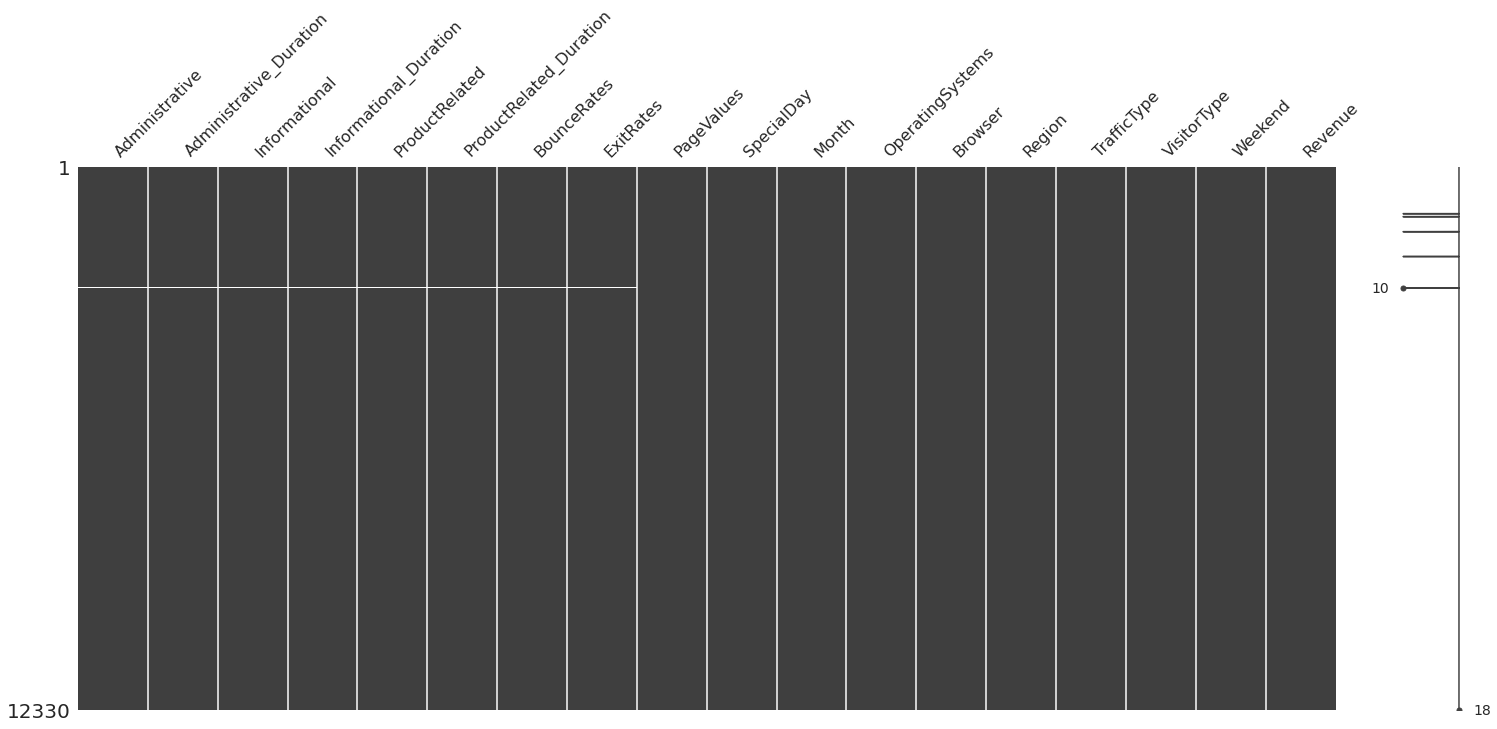

In [5]:
import missingno as msno 
msno.matrix(customer_copy)

Looks like we don't have any null values except one. But plots sometimes deceive us, numbers don't. Let's check with the numbers

In [6]:
print('Data columns with null values:',customer_copy.isnull().sum(), sep = '\n')

Data columns with null values:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


If you have noticed in the plot, there was no null values shown. But while checking each records we have **14 null records in 8 features**. Let's decide on how to deal these missing records

### b)Handling Missing Values

**Part1**

The Administration, Informational and product related features are types of pages, technically they are nominal data. So I guess we impute that data with median, Also before doing that we have the min value as 0(page type as 0 means it should be null value) should also be considered as NaN value, so we convert it into NaN value and impute it. 

In [7]:
for cols in ['Administrative','Informational','ProductRelated']:
    customer_copy[cols].replace(0, np.nan, inplace= True)
for cols in ['Administrative','Informational','ProductRelated']:
    print('{} null values:'.format(cols),customer_copy[cols].isnull().sum(), sep = '\n')

Administrative null values:
5768
Informational null values:
9700
ProductRelated null values:
49


We have now figured out the real number null values hiding in the dataset. Let's impute them with the median

In [8]:
for cols in ['Administrative','Informational','ProductRelated']:
    median_value=customer_copy[cols].median()
    customer_copy[cols]=customer_copy[cols].fillna(median_value)
for cols in ['Administrative','Informational','ProductRelated']:
    print('{} null values:'.format(cols),customer_copy[cols].isnull().sum(), sep = '\n')

Administrative null values:
0
Informational null values:
0
ProductRelated null values:
0


**Part 2**

We are left with page duration bounce and exit rates where we have -1 as the minimum value in duration(time cannot be negative) which should be considered as a null value and 0 duration(time can't be zero) occurs when the page type was 0 which we imputed earlier, so we can convert this into NaN and impute this as well.<br>
For rates, we can impute the the NaN values directly(Here we don't need to worry about rates being bounce rates having 0 values, as there are many such cases where bounce rates can be 0 because the user must have liked the webiiste and moved onto other web pages towards transactions)

In [9]:
for cols in ['Administrative_Duration','Informational_Duration','ProductRelated_Duration']:
    customer_copy[cols].replace(0, np.nan, inplace= True)
for cols in ['Administrative_Duration','Informational_Duration','ProductRelated_Duration']:
    customer_copy[cols].replace(-1, np.nan, inplace= True)
for cols in ['Administrative_Duration','Informational_Duration','ProductRelated_Duration']:
    print('{} null values:'.format(cols),customer_copy[cols].isnull().sum(), sep = '\n')

Administrative_Duration null values:
5904
Informational_Duration null values:
9926
ProductRelated_Duration null values:
766


We have now figured out the real number null values hiding in the dataset. Let's impute them with the mean value

In [10]:
for cols in ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates']:
    mean_value=customer_copy[cols].mean()
    customer_copy[cols]=customer_copy[cols].fillna(mean_value)
for cols in ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates']:
    print('{} null values:'.format(cols),customer_copy[cols].isnull().sum(), sep = '\n')

Administrative_Duration null values:
0
Informational_Duration null values:
0
ProductRelated_Duration null values:
0
BounceRates null values:
0
ExitRates null values:
0


We have handled all the null values. Let's try to visualize the data 

<a id="section-three"></a>
# *6. Data Visualization*
Since we have much numerical data, let's keep our plots much targetted towards our machine learning models. Also let's figure out which feature importances and prune away least important ones

<a id="subsection-eight"></a>
## 6.1 Duration of pages vs Revenue

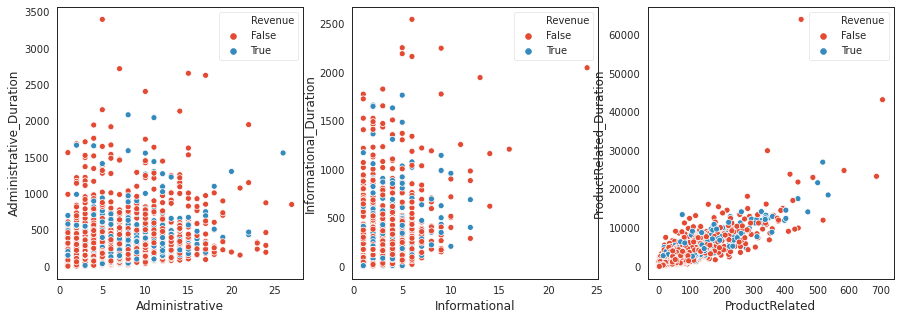

In [11]:
plt.figure(figsize = (15, 5))
#plt.style.use('seaborn-white')
plt.subplot(131)
sns.scatterplot(x="Administrative", y="Administrative_Duration",hue="Revenue", data=customer_copy)
plt.subplot(132)
sns.scatterplot(x="Informational", y="Informational_Duration",hue="Revenue", data=customer_copy)
plt.subplot(133)
sns.scatterplot(x="ProductRelated", y="ProductRelated_Duration",hue="Revenue", data=customer_copy)

**Insights:**
* High duration users are found for the initial types of pages **(0-15: Administrative;0-10:Informational;0-300:Product Related)**
* Revenue hasn't been generated for the **latter types**
* There is a linear relationship between product_related and Product duration **(multicollinearity)**


<a id="subsection-nine"></a>
## 6.2 Month Vs Page value Vs Revenue

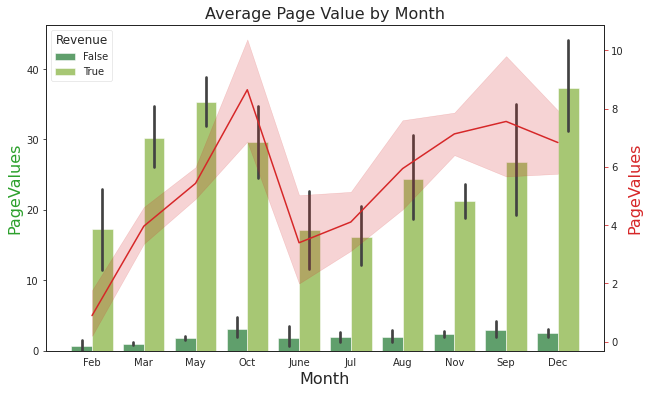

In [12]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('Average Page Value by Month', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 = sns.barplot(x='Month', y='PageValues', data = customer_copy, palette='summer',hue='Revenue')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.lineplot(x='Month', y='PageValues', data = customer_copy, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

**Insights:**
* The page value has considerably increased over the months with some fall **in mid of the year**
* Page value is **high** when there is a revenue
* There is a **high variance** in page value data considering each month

<a id="subsection-ten"></a>
## 6.3 Bounce & Exit Rates Vs Revenue

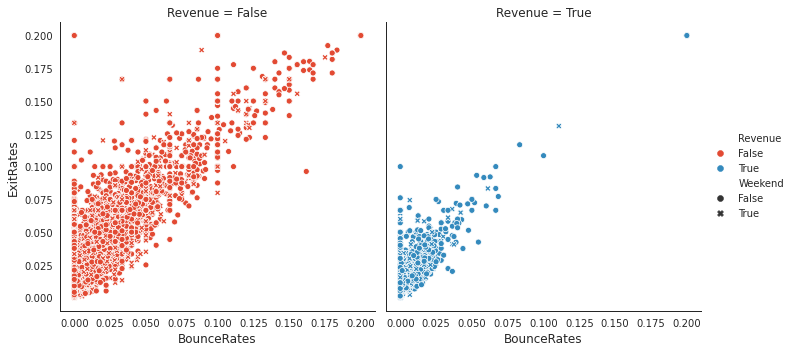

In [13]:
sns.relplot(x="BounceRates", y="ExitRates",col="Revenue",hue="Revenue",style="Weekend", data=customer_copy)

**Insights:**
* High Bounce and Exit Rates lead to **no Revenue**
* Revenue data is **heavily imbalanced**
* More Bounce and Exit rates when it is **not a weekend**

<a id="subsection-eleven"></a>
## 6.4 Visitor type & Exit Rates Vs Revenue

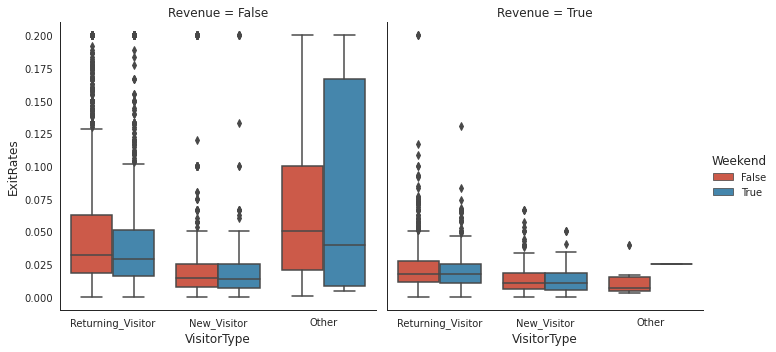

In [14]:
sns.catplot(x="VisitorType", y="ExitRates",
                hue="Weekend", col="Revenue",
                data=customer_copy, kind="box");

**Insights:**
* The Exit rates are **very low** in spread when there is a revenue and there isn't much change in exit rates considering the weekend and type of visitors
* A **large variation** is seen in exit rates other category when it is in weekend and haven't made any revenue. May be they are of casual window shopping kind.
* **New visitors** have low exit rates which and are pretty much same in both the revenue cases. It's pretty good to hold the new visitors.

<a id="subsection-twelve"></a>
## 6.5 Correlation map 

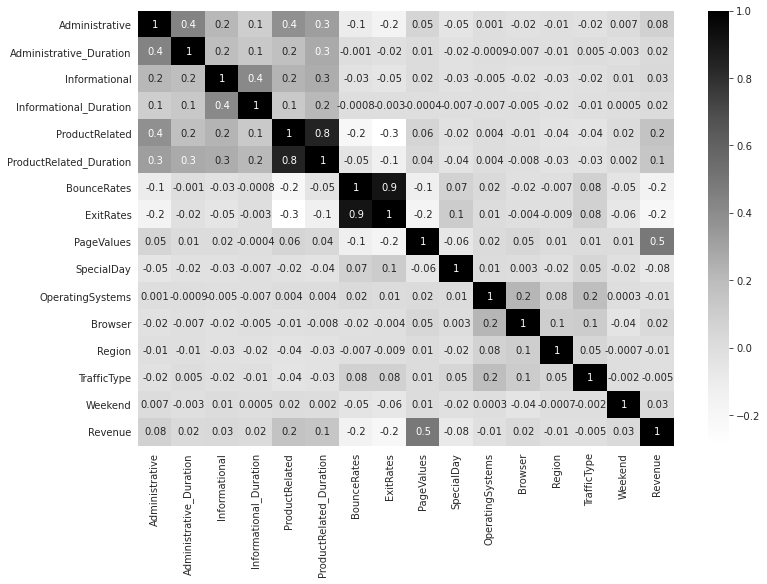

In [15]:
sns.heatmap(customer_copy.corr(),annot=True,fmt='.1g',cmap='Greys')

**Insights:**
* There is a high correlation with **page values and revenue**
* Bounces rates got **negative** influence on revenue
* Pages which has **high bounce rates tends to have high exit rates** as well
* The website earns a lot of revenue from **product related pages**

<a id="section-four"></a>
# *Strategies for the client to increase sales conversion rate*

### Strategy 1:
The landing page has to be very attractive and UI friendly. We can provide minimum information and lot more icon features rather than bombarding the visitor with too much information(words) which can increase the exit rates. Also the website can be transparent about the shipping charges along with the price of product in the landing page. If the shipping charges suddenly pops up on checkout page that might increase exit rates
### Strategy 2:
Categorize each user and send personalized emails. Personalized emails can reduce retention and improve loyalty to the brand
### Strategy 3:
Introducing ad banners when the visitor tries to quit the page. The ad banner can be about discounts/offers which can make  the visitor stay in the page
### Strategy 4:
Enagaging loyal customer by giving them loyalty badge and providing unique access to the products like they can book before the official release and offers for them
### Strategy 5:
Increase the duration of website on monthly basis by introducing monthly themed offers and products.This can increase the conversion rate
### Strategy 6:
Optimize the SEO from Google other sources based on the place, community and language. They can get targetted with ads in regional language or regional hot topic to make the visitor hooked to the website
### Strategy 7:
Smooth UI and interactions with the website across all the browsers and they can read OTP inside the checkout page rather than redirecting it into another page. Even if it is directed to other page, it should automatically redirect to the page ensuring the purchase success.

<a id="section-five"></a>
# *7.Feature Engineering and Selection*
Now let's work on the data little bit and jump into the feature engineering. First, Let's remove the outliers

In [16]:
feature_customer=customer_copy.copy()

<a id="subsection-thirteen"></a>
## 7.1 Handling Outliers
Let's check out our numerical feature outliers through boxplot

Text(0.5, 1.0, 'PageValues')

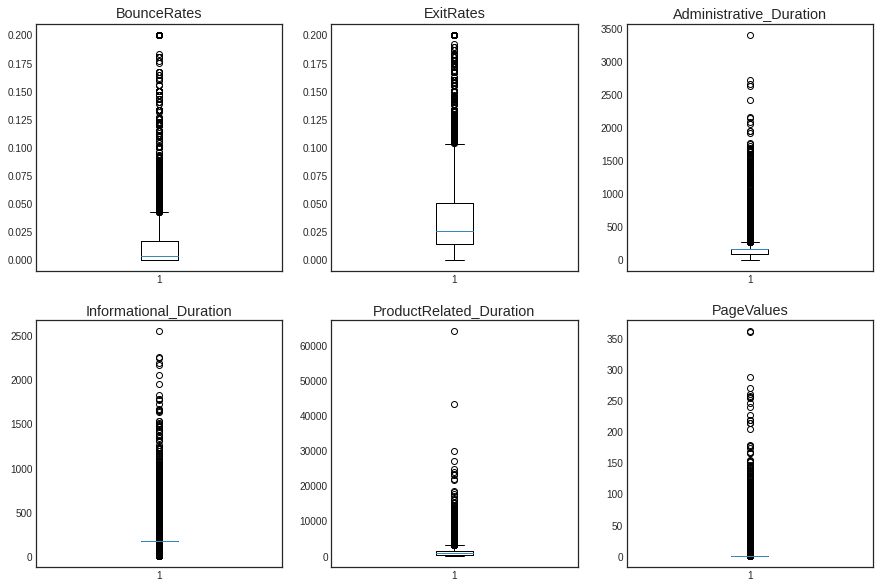

In [17]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(231)
plt.boxplot(feature_customer['BounceRates'])
ax.set_title('BounceRates')
ax=plt.subplot(232)
plt.boxplot(feature_customer['ExitRates'])
ax.set_title('ExitRates')
ax=plt.subplot(233)
plt.boxplot(feature_customer['Administrative_Duration'])
ax.set_title('Administrative_Duration')
ax=plt.subplot(234)
plt.boxplot(feature_customer['Informational_Duration'])
ax.set_title('Informational_Duration')
ax=plt.subplot(235)
plt.boxplot(feature_customer['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')
ax=plt.subplot(236)
plt.boxplot(feature_customer['PageValues'])
ax.set_title('PageValues')

oof, we have a lot of outliers, if you notice informational_duration and page values, they don't have any distribution and if you remove the outliers there will be one value left in it. So except that two features, we are removing the outliers via IQR method

In [18]:
numerical_features=['BounceRates','ExitRates','Administrative_Duration','ProductRelated_Duration']
for cols in numerical_features:
    Q1 = feature_customer[cols].quantile(0.25)
    Q3 = feature_customer[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (feature_customer[cols] >= Q1 - 1.5 * IQR) & (feature_customer[cols] <= Q3 + 1.5 *IQR)
    feature_customer=feature_customer.loc[filter]

Text(0.5, 1.0, 'ProductRelated_Duration')

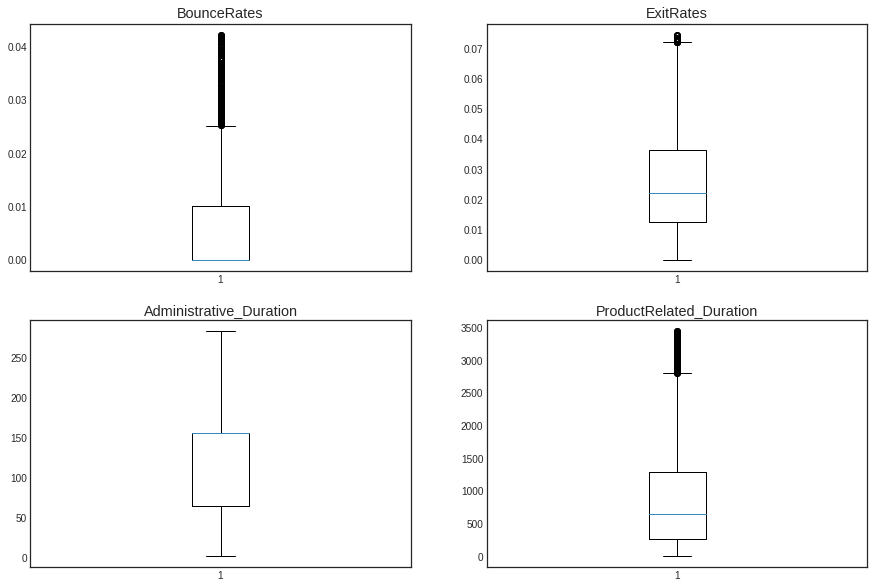

In [19]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(feature_customer['BounceRates'])
ax.set_title('BounceRates')
ax=plt.subplot(222)
plt.boxplot(feature_customer['ExitRates'])
ax.set_title('ExitRates')
ax=plt.subplot(223)
plt.boxplot(feature_customer['Administrative_Duration'])
ax.set_title('Administrative_Duration')
ax=plt.subplot(224)
plt.boxplot(feature_customer['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')

We have removed a good number of outliers !

<a id="subsection-fourteen"></a>
## 7.2 Special Day- Feature Clubbing !
Here I'm planning to club the special day feature which has 0.2,0.4,0.6,0.8,1 . So let's club the values and replace the values based on a condition. These are probability values, so
* If it is greater than 0.4 it is '1' which indicates it is a 'Special day'. 
* If it is less than or equal to 0.4 it is 0 which indicates 'Not a Special day'

In [20]:
feature_customer.loc[feature_customer['SpecialDay'] > 0.4, 'SpecialDay'] = 1
feature_customer.loc[feature_customer['SpecialDay'] <= 0.4, 'SpecialDay'] = 0
feature_customer['SpecialDay'].value_counts()

0.0    8260
1.0     521
Name: SpecialDay, dtype: int64

Now, let's change the values into boolean as it makes more sense
* 1-True-Special Day
* 0-False-Not a Special Day

In [21]:
feature_customer['SpecialDay']=feature_customer['SpecialDay'].astype('bool')
feature_customer['SpecialDay'].value_counts()

False    8260
True      521
Name: SpecialDay, dtype: int64

<a id="subsection-fifteen"></a>
## 7.3 Converting Dtypes 
Since we have catgorical variables which are identified as numerical. I guess it is better to convert them to categories

In [22]:
for cols in ['Administrative','Informational','ProductRelated','OperatingSystems','Browser',
             'Region','TrafficType','VisitorType']:
    feature_customer[cols] = feature_customer[cols].astype('category')

In [23]:
feature_customer.dtypes

Administrative             category
Administrative_Duration     float64
Informational              category
Informational_Duration      float64
ProductRelated             category
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                     bool
Month                        object
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                        bool
Revenue                        bool
dtype: object

We have converted them to categories, Now let's scale numerical features

<a id="subsection-sixteen"></a>
## 7.4 Feature Scaling
Let's standardize our numerical features as we have more outliers

In [24]:
Categorical_variables=['Weekend','Revenue','Administrative','Informational','ProductRelated','SpecialDay',
 'OperatingSystems','Browser','Region','Month','TrafficType','VisitorType']


feature_scale=[feature for feature in feature_customer.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(feature_customer[feature_scale])

StandardScaler()

In [25]:
scaled_data = pd.concat([feature_customer[['Weekend','Revenue','Administrative','Informational',
                                    'ProductRelated','SpecialDay','OperatingSystems',
                                    'Browser','Region','Month','TrafficType','VisitorType']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(feature_customer[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,Weekend,Revenue,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,True,False,3.0,2.0,10.0,False,3,3,1,Feb,4,Returning_Visitor,0.592747,0.049539,-0.328236,1.410667,1.416791,-0.330773
1,False,False,3.0,2.0,19.0,False,2,2,1,Feb,3,Returning_Visitor,0.592747,0.049539,-0.924611,0.976358,-0.081770,-0.330773
2,False,False,3.0,2.0,3.0,False,2,4,1,Feb,2,Returning_Visitor,0.592747,0.049539,-0.188997,-0.652304,-0.219569,-0.330773
3,False,False,3.0,2.0,3.0,False,1,1,3,Feb,3,Returning_Visitor,0.592747,0.049539,-0.621205,-0.652304,2.398607,-0.330773
4,False,False,3.0,2.0,16.0,False,1,1,4,Feb,3,Returning_Visitor,0.592747,0.049539,-0.605139,1.281732,-0.006842,-0.330773



We have scaled our numerical features using standard scaler

<a id="subsection-seventeen"></a>
## 7.5 Label Encoding
Let's encode our month feature using Label encoder

In [26]:
encoded_features=['Month','VisitorType']

label_data = scaled_data.copy()
label_encoder = LabelEncoder()
for col in encoded_features:
    label_data[col] = label_encoder.fit_transform(scaled_data[col])
    
label_data.head()

,Weekend,Revenue,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,True,False,3.0,2.0,10.0,False,3,3,1,2,4,2,0.592747,0.049539,-0.328236,1.410667,1.416791,-0.330773
1,False,False,3.0,2.0,19.0,False,2,2,1,2,3,2,0.592747,0.049539,-0.924611,0.976358,-0.081770,-0.330773
2,False,False,3.0,2.0,3.0,False,2,4,1,2,2,2,0.592747,0.049539,-0.188997,-0.652304,-0.219569,-0.330773
3,False,False,3.0,2.0,3.0,False,1,1,3,2,3,2,0.592747,0.049539,-0.621205,-0.652304,2.398607,-0.330773
4,False,False,3.0,2.0,16.0,False,1,1,4,2,3,2,0.592747,0.049539,-0.605139,1.281732,-0.006842,-0.330773


We have encoded the required features, Let's prune our features through Feature selection

<a id="subsection-eighteen"></a>
## 7.6 Feature Selection
Let's check the feature importances and prune our features to make our model perform well. 

In [27]:
X=label_data.drop(['Revenue'],axis=1)
y=label_data.Revenue

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [28]:
print(model.feature_importances_)

[0.01489878 0.04424134 0.02439878 0.05740091 0.00410558 0.03052204
 0.03061789 0.04132059 0.04703754 0.04239708 0.01483835 0.05037305
 0.02964114 0.06809217 0.0432982  0.06795821 0.38885835]


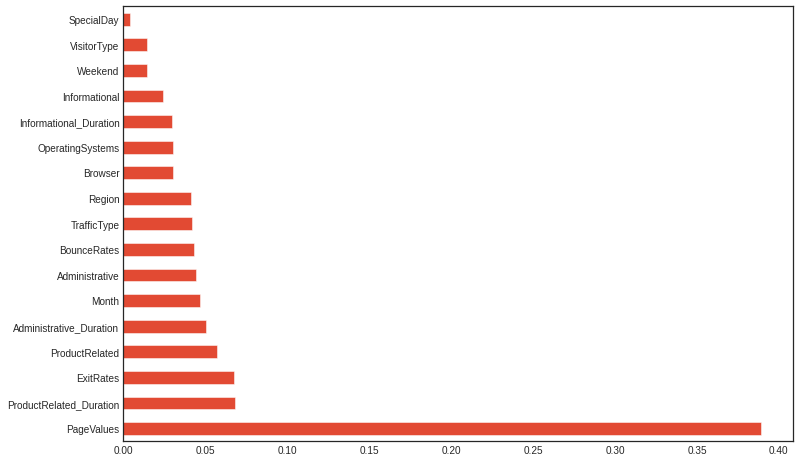

In [29]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

From the bar plot we can see the importances of features based on it's impact towards output. Let's  take up the top 14 features 

<a id="subsection-nineteen"></a>
## 7.7 Train and Test Split (80:20)
Let's drop the required features and split the data into train and test

In [30]:
X=label_data.drop(['SpecialDay','VisitorType','Weekend','Revenue'],axis=1)
y=label_data.Revenue

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (7024, 14)
Input Test: (1757, 14)
Output Training: (7024,)
Output Test: (1757,)


<a id="section-six"></a>
# *8. Modelling our Data*
Let's enter into the crucial phase of building THE machine learning model. Before checking "what could be the best algorithm for prediction" we have to decide on the "why". It is highly important. 
### Why?
Our main aim is to predict whether there is a revenue transaction made owing to those values from the features. The output is either going to be 0 or 1. So we can decide that we can use classification models for our problem
### What ?
To decide on what can be the best possible classification models let's not waste time running models. Instead we do quality code by creating pipeline and check all the model accuracy at once. After that we will select one model based on it's accuracy. 

<a id="subsection-twenty"></a>
## 8.1 Selecting the right model- Cross Validation
Let's select our model using cross validation

In [31]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
rt_cv=RandomForestClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC(kernel='linear')
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3:'KNN',4:'SVC',5:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,rt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8839519178192241
Decision Tree Test Accuracy: 0.85160451019874
RandomForest Test Accuracy: 0.8996666070627992
KNN Test Accuracy: 0.8502442462831805
SVC Test Accuracy: 0.8882790290270834
Naive Bayes Test Accuracy: 0.8863398301548923


From the test results, we can choose **Random forest** as our model. It gave us more accurate results since it is an ensemble model. So Let's also consider working in **SVC** as well. 

Next we will also test our choice via pipelines as well.

<a id="subsection-twentyone"></a>
## 8.2 Selecting the right model-Pipeline
Let's select our model using pipeline

In [32]:
#Creating the pipeline
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=0))])
pipeline_dt=Pipeline([('dt_classifier',DecisionTreeClassifier())])
pipeline_randomforest=Pipeline([('rf_classifier',RandomForestClassifier())])
pipeline_knn=Pipeline([('knn_classifier',KNeighborsClassifier())])
pipeline_svc=Pipeline([('svc_classifier',SVC(kernel='linear'))])
pipeline_nb=Pipeline([('nb_classifier',BernoulliNB())])

#Assigning the pipeline and relevant outcome variable
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest,pipeline_knn,pipeline_svc,pipeline_nb]
best_accuracy=0.0
best_classifier=0
best_pipeline=""

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3:'KNN',4:'SVC',5:'Naive Bayes'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

#Evaluating each model
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.8992601024473534
Decision Tree Test Accuracy: 0.8622652248150257
RandomForest Test Accuracy: 0.910643141718839
KNN Test Accuracy: 0.8634035287421742
SVC Test Accuracy: 0.9009675583380763
Naive Bayes Test Accuracy: 0.8895845190665908


Great. We have got pretty good accurate results from our model. We can see that **Random Forest** have the highest accuracy being an ensemble model. It usually does have higher accuracy. Let's select the best model

In [33]:
#Choosing the best model for our problem
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:RandomForest


**Choice of models:**
1. Random Forest(Ensemble)
2. SVC

First let's build our Random Forest model along with Hyperparameter tuning

<a id="subsection-twentytwo"></a>
## 8.3 Random Forest with Hyperparameter Tuning
Let's build a random forest classifier model with hyperparameter tuning 

In [34]:
# Create a pipeline
pipe = make_pipeline((RandomForestClassifier()))
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [{"randomforestclassifier": [RandomForestClassifier()],
                 "randomforestclassifier__n_estimators": [10, 100, 1000],
                 "randomforestclassifier__max_depth":[5,8,15,25,30,None],
                 "randomforestclassifier__min_samples_leaf":[1,2,5,10,15,100],
                 "randomforestclassifier__max_leaf_nodes": [2, 5,10]}]
#Gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

We have fitted the model by creating a list for all parameters and we will be evaluating based on cross validation

In [35]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=8, max_leaf_nodes=10,
                                        min_samples_leaf=2))])
The mean accuracy of the model is: 0.9032441661923734


We have got the best parameters for the model and the mean accuracy is 90.2%

### Fitting all the parameters to the model
Let's fit all the parameters we derived by hyperparameter tuning into the actual model

In [36]:
rt=RandomForestClassifier(max_depth=30, max_leaf_nodes=10,min_samples_leaf=15)
rt.fit(X_train,y_train)
y_pred=rt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9032441661923734


We have got 90.6% accuracy. Great 

<a id="subsection-twentythree"></a>
## 8.4 SVC with Hyperparameter Tuning
Let's build our second classifier model SVC by giving some hyperparameters

**Note: Hyperparameter tuning of SVM took more than hours to run in my device. So I'm bypassing hyperparameter tuning for this section. I will update once I have a better device in my hands**

In [37]:
svc_classifier = SVC(kernel='linear',random_state = 0)
svc_classifier.fit(X_train,y_train)
y_pred=svc_classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9009675583380763
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.98      0.94      1488
        True       0.78      0.49      0.60       269

    accuracy                           0.90      1757
   macro avg       0.85      0.73      0.77      1757
weighted avg       0.89      0.90      0.89      1757



We have 90% accuracy and Also we have  91% precision

<a id="section-seven"></a>
# Conclusion 
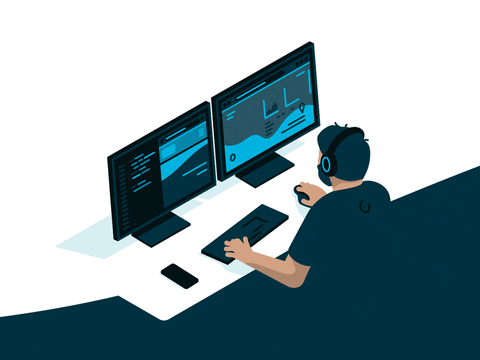
The significant importance of  PageValue suggests that customers look at considerably different products and its recommendations. Hence a significant improvement on recommendation engines and bundle packages would bring in more conversions. Including more products exploiting the long tail effect in e-commerce will also bring in more revenue drivers. <br>

Here are the revised pointers than can help improve the converion rate
1. Following a minimalist approach in UI
2. Being transparent to the visitors about the prices and information of product
3. Improving the stay duration by providing them targetted ads like discounts and offers
4. Reducing the bounce rates through faster refreshing rate and attractive landing page which has highly targetted products exclusive for the visitors
5. Personalized emails for each visitors and engaging the loyal visitors(returning visitor) through coupons and exclusive access of products

## Hit upvote if you like my work and also check out my [other notebooks](https://www.kaggle.com/benroshan/notebooks)